## Import Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pyjet
import pandas as pd
import sys, os
import importlib
import time
import datetime

%config InlineBackend.figure_format = 'retina'  # increase figure showing resolution

## Import .root File

In [2]:
filepath_3_5 = '/youwei_home/SVJ_py/Tutorial_v2/ROOT/rinv03/test0_2.root'  # 0_2 stands for zeroth generation and Z'=1500 GeV
file_3_5 = uproot.open(filepath_3_5)['Delphes;1']
file_3_5

<TTree b'Delphes' at 0x7f87f00a5d30>

In [6]:
file_3_5.show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged

## Define the class to Fill Particle Informations into np.array

In [4]:
class BranchGenParticles:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('Particle.Status'))
        self.Status = data.array('Particle.Status')
        self.PID = data.array('Particle.PID')
        self.M1 = data.array('Particle.M1')
        self.M2 = data.array('Particle.M2')
        self.D1 = data.array('Particle.D1')
        self.D2 = data.array('Particle.D2')
        self.PT = data.array('Particle.PT')
        self.Eta = data.array('Particle.Eta')
        self.Phi = data.array('Particle.Phi')
        self.Mass = data.array('Particle.Mass')
        self.Labels = ['Status', 'PID', 'M1', 'M2', 'D1', 'D2', 'PT', 'Eta', 'Phi', 'Mass']
        
        
#     To get the GenParticles information array in the i-th event.
    def length_i(self, i):
        return len(self.Status[i])
    def Status_i(self, i):
        return self.Status[i]
    def PID_i(self, i):
        return self.PID[i]
    def M1_i(self, i):
        return self.M1[i]
    def M2_i(self, i):
        return self.M2[i]
    def D1_i(self, i):
        return self.D1[i]
    def D2_i(self, i):
        return self.D2[i]
    def PT_i(self, i):
        return self.PT[i]
    def Eta_i(self, i):
        return self.Eta[i]
    def Phi_i(self, i):
        return self.Phi[i]
    def Mass_i(self, i):
        return self.Mass[i]
    
    
    
class BranchJet:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('Jet.PT'))
        self.PT = data.array('Jet.PT')
        self.Eta = data.array('Jet.Eta')
        self.Phi = data.array('Jet.Phi')
        self.Mass = data.array('Jet.Mass')
        
    def length_i(self, i):
        return len(self.PT[i])
    def PT_i(self, i):
        return self.PT[i]
    def Eta_i(self, i):
        return self.Eta[i]
    def Phi_i(self, i):
        return self.Phi[i]
    def Mass_i(self, i):
        return self.Mass[i]
    
    
    
class Event_Weight:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('Event.Weight'))
        self.Event_Weight = np.array(data.array('Event.Weight'))
        
    def Event_Weight_i(self, i):
        return self.Event_Weight[i]

In [7]:
class branchGenJet:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('GenJet.PT'))
        self.PT = data.array('GenJet.PT')
        self.Eta = data.array('GenJet.Eta')
        self.Phi = data.array('GenJet.Phi')
        self.Mass = data.array('GenJet.Mass')
        
    def length_i(self, i):
        return len(self.PT[i])
    def PT_i(self, i):
        return self.PT[i]
    def Eta_i(self, i):
        return self.Eta[i]
    def Phi_i(self, i):
        return self.Phi[i]
    def Mass_i(self, i):
        return self.Mass[i]

    

class branchMissingET:
    def __init__(self, data):
        self.data = data
        self.length = len(data.array('MissingET.MET'))
        self.MET = data.array('MissingET.MET')
        self.Eta = data.array('MissingET.Eta')
        self.Phi = data.array('MissingET.Phi')
        
    def length_i(self, i):
        return len(self.MET[i])
    def MET_i(self, i):
        return self.MET[i]
    def Eta_i(self, i):
        return self.Eta[i]
    def Phi_i(self, i):
        return self.Phi[i]

## Load Event via class

In [5]:
GP_3_5, Jet_3_5, EW_3_5 = BranchGenParticles(file_3_5), BranchJet(file_3_5), Event_Weight(file_3_5)

In [8]:
GenJet_3_5, MissingET_3_5 = branchGenJet(file_3_5), branchMissingET(file_3_5)

In [9]:
print(GenJet_3_5.length, MissingET_3_5.length)

14418 14418


In [10]:
print(GenJet_3_5.PT_i(5), MissingET_3_5.MET_i(5))

[263.383    179.98515  149.56447   37.45275   31.619532] [100.081535]


## Select Data

In [11]:
leading_PT = []
leading_event_sele = []

for i in range(GenJet_3_5.length):
    if GenJet_3_5.length_i(i) == 0:
        continue
    leading_PT.append(GenJet_3_5.PT_i(i)[0])
    leading_event_sele.append(i)
        
print('There are {} events that are valid.'.format(len(leading_PT)))

There are 14404 events that are valid.


In [16]:
missing_PT = []
missing_event_sele = []

for i in range(MissingET_3_5.length):
    if MissingET_3_5.MET_i(i)[0] >= 200:
        missing_PT.append(MissingET_3_5.MET_i(i)[0])
        missing_event_sele.append(i)
        
print('There are {} events that are valid.'.format(len(missing_PT)))

There are 1187 events that are valid.


In [18]:
print(MissingET_3_5.MET_i(5))
print(MissingET_3_5.MET_i(5)[0])
MissingET_3_5.MET_i(5)

[100.081535]
100.081535


array([100.081535], dtype=float32)

## Plot

### 1. Leading $p_T$

In [19]:
print(np.min(leading_PT), np.max(leading_PT), (np.max(leading_PT)-np.min(leading_PT))/250)

20.390587 1725.063 6.818689453125


Total events = 14404 for standalone


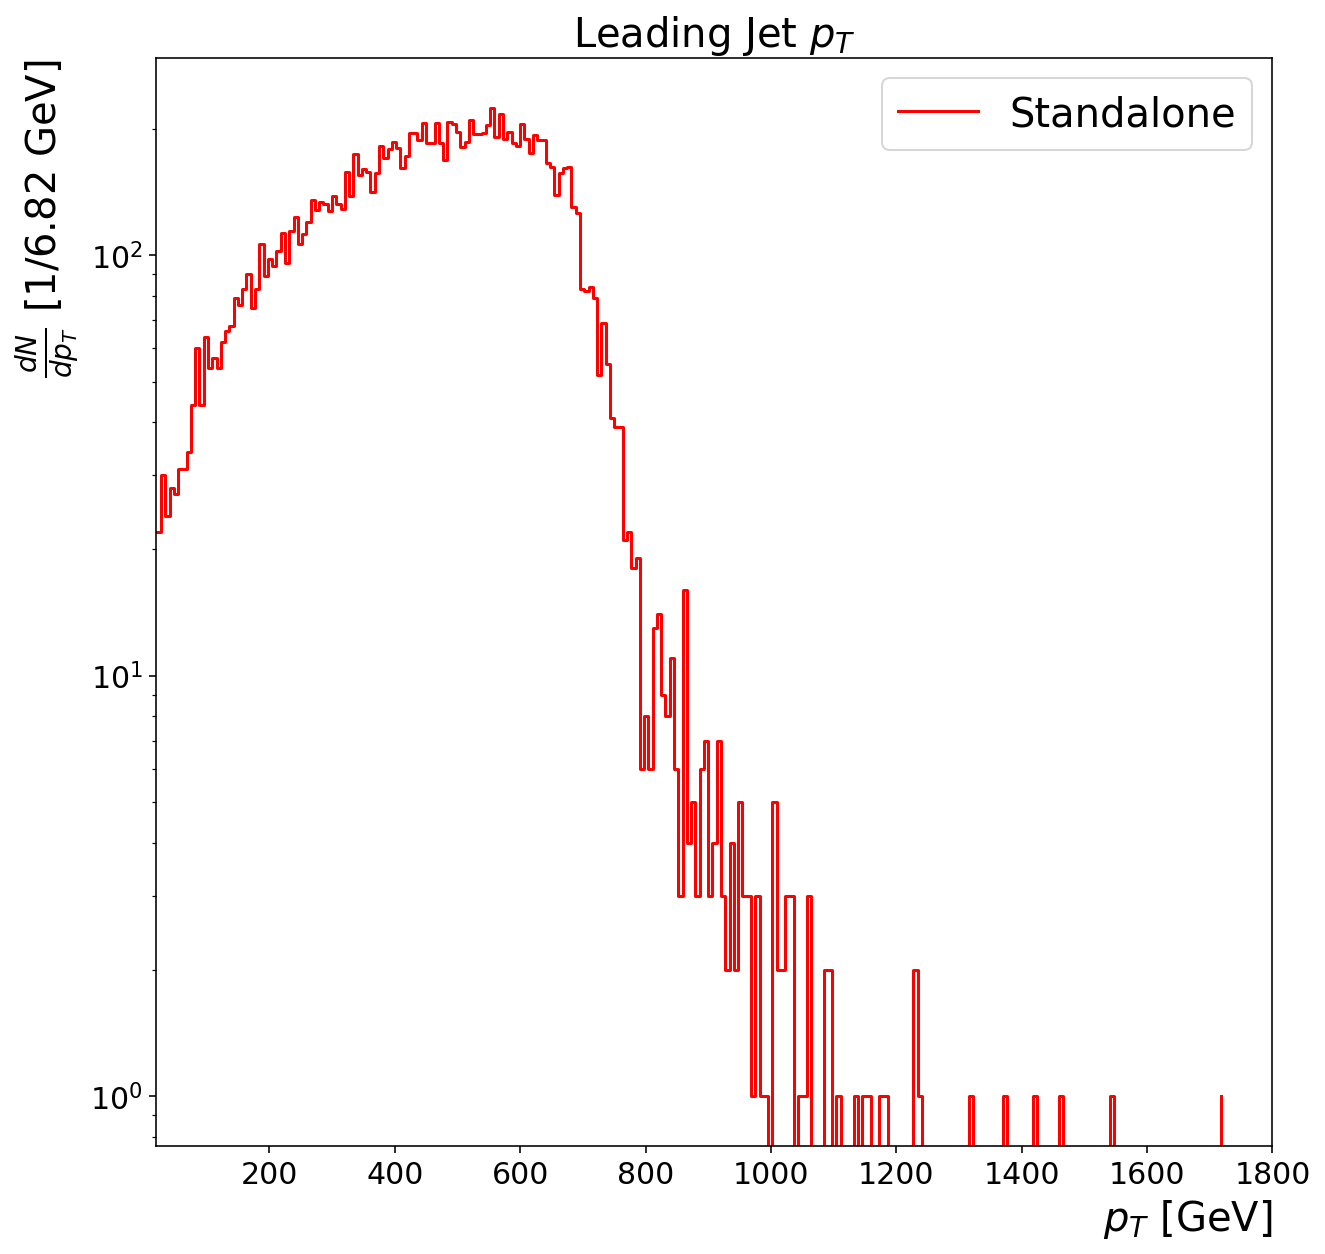

In [26]:
plt.figure(figsize=(10,10))  # plot size
print('Total events = {} for standalone'.format(len(leading_PT)))

bin_size = np.linspace(np.min(leading_PT),np.max(leading_PT),251)
hist_leading, bins_leading = np.histogram(leading_PT, bins=bin_size)
plt.step(bins_leading[:-1], hist_leading, where='post', color='red', label='Standalone')



plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Leading Jet $p_T$', fontsize=20)
plt.xlabel('$p_T$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dp_T}$ [1/6.82 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(20,1800)
plt.show()

### 2. Missing Transverse Energy for MET $\ge$ 200

In [23]:
print(np.min(missing_PT), np.max(missing_PT), (np.max(missing_PT)-np.min(missing_PT))/250)

200.02934 470.15082 1.08048583984375


Total events = 1187 for standalone


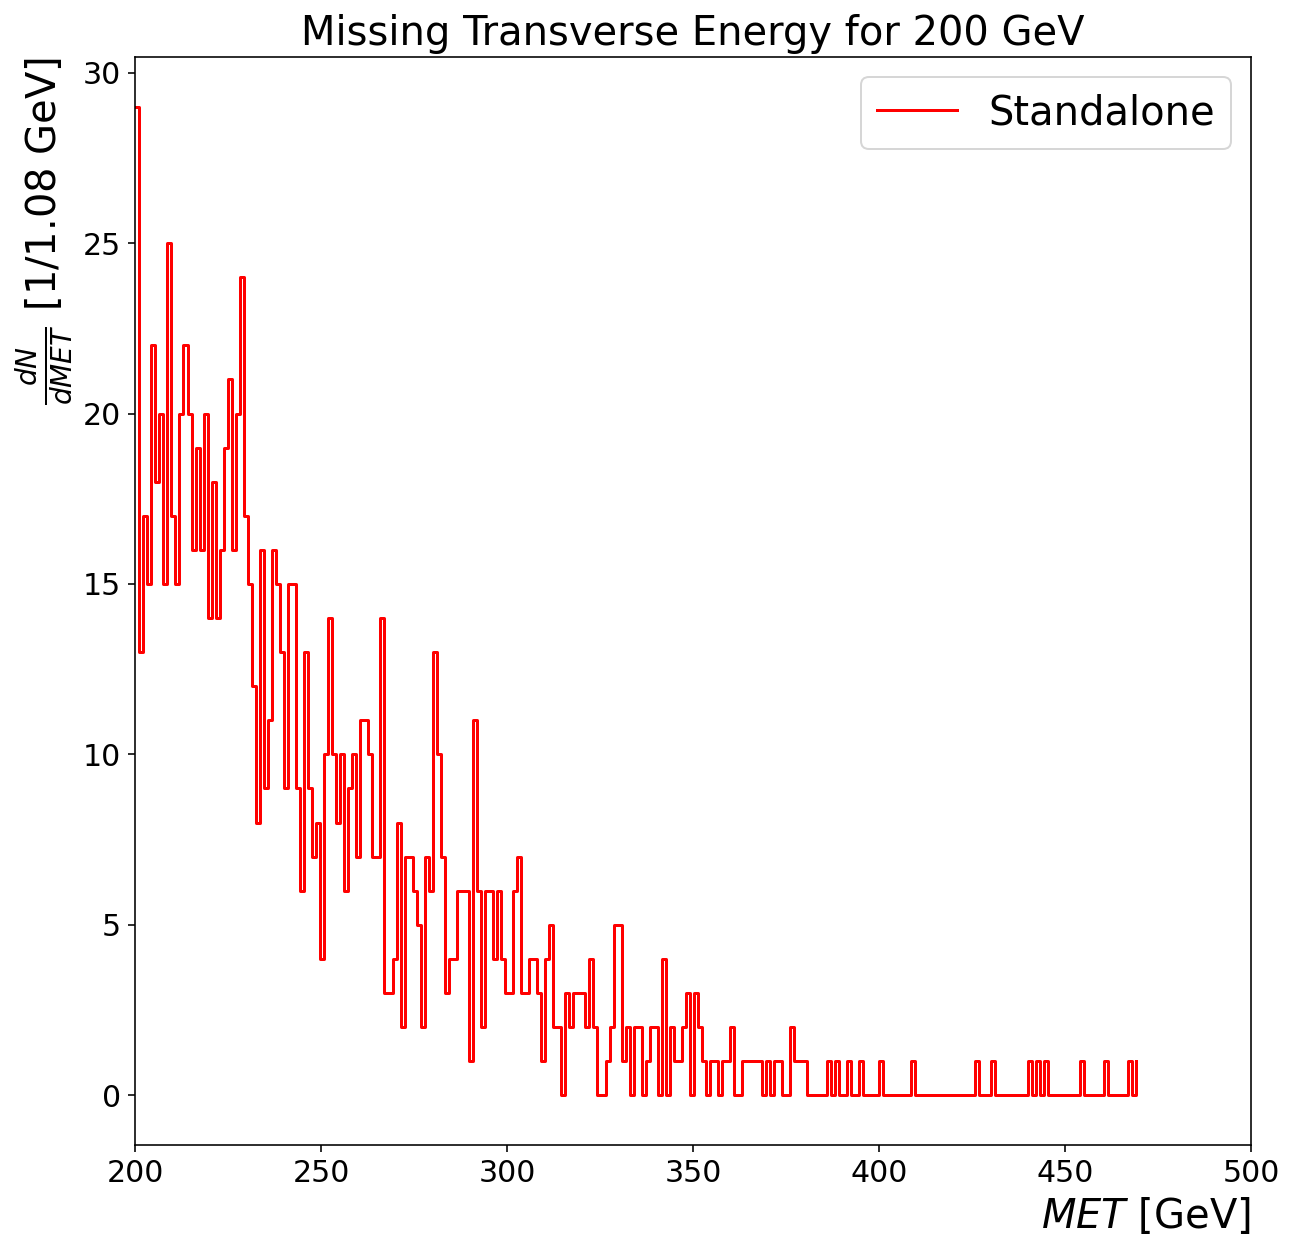

In [31]:
plt.figure(figsize=(10,10))  # plot size
print('Total events = {} for standalone'.format(len(missing_PT)))

bin_size = np.linspace(np.min(missing_PT),np.max(missing_PT),251)
hist, bins = np.histogram(missing_PT, bins=bin_size)
plt.step(bins[:-1], hist, where='post', color='red', label='Standalone')



plt.legend(fontsize=20)
# plt.yscale('log')
plt.title('Missing Transverse Energy for 200 GeV', fontsize=20)
plt.xlabel('$MET$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dMET}$ [1/1.08 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(200,500)
plt.show()

### 3. Missing Transverse Energy MET $\ge$ 150

In [27]:
missing_PT_150 = []
missing_event_sele_150 = []

for i in range(MissingET_3_5.length):
    if MissingET_3_5.MET_i(i)[0] >= 150:
        missing_PT_150.append(MissingET_3_5.MET_i(i)[0])
        missing_event_sele_150.append(i)
        
print('There are {} events that are valid.'.format(len(missing_PT_150)))

There are 2559 events that are valid.


In [28]:
print(np.min(missing_PT_150), np.max(missing_PT_150), (np.max(missing_PT_150)-np.min(missing_PT_150))/250)

150.0077 470.15082 1.280572509765625


Total events = 2559 for standalone


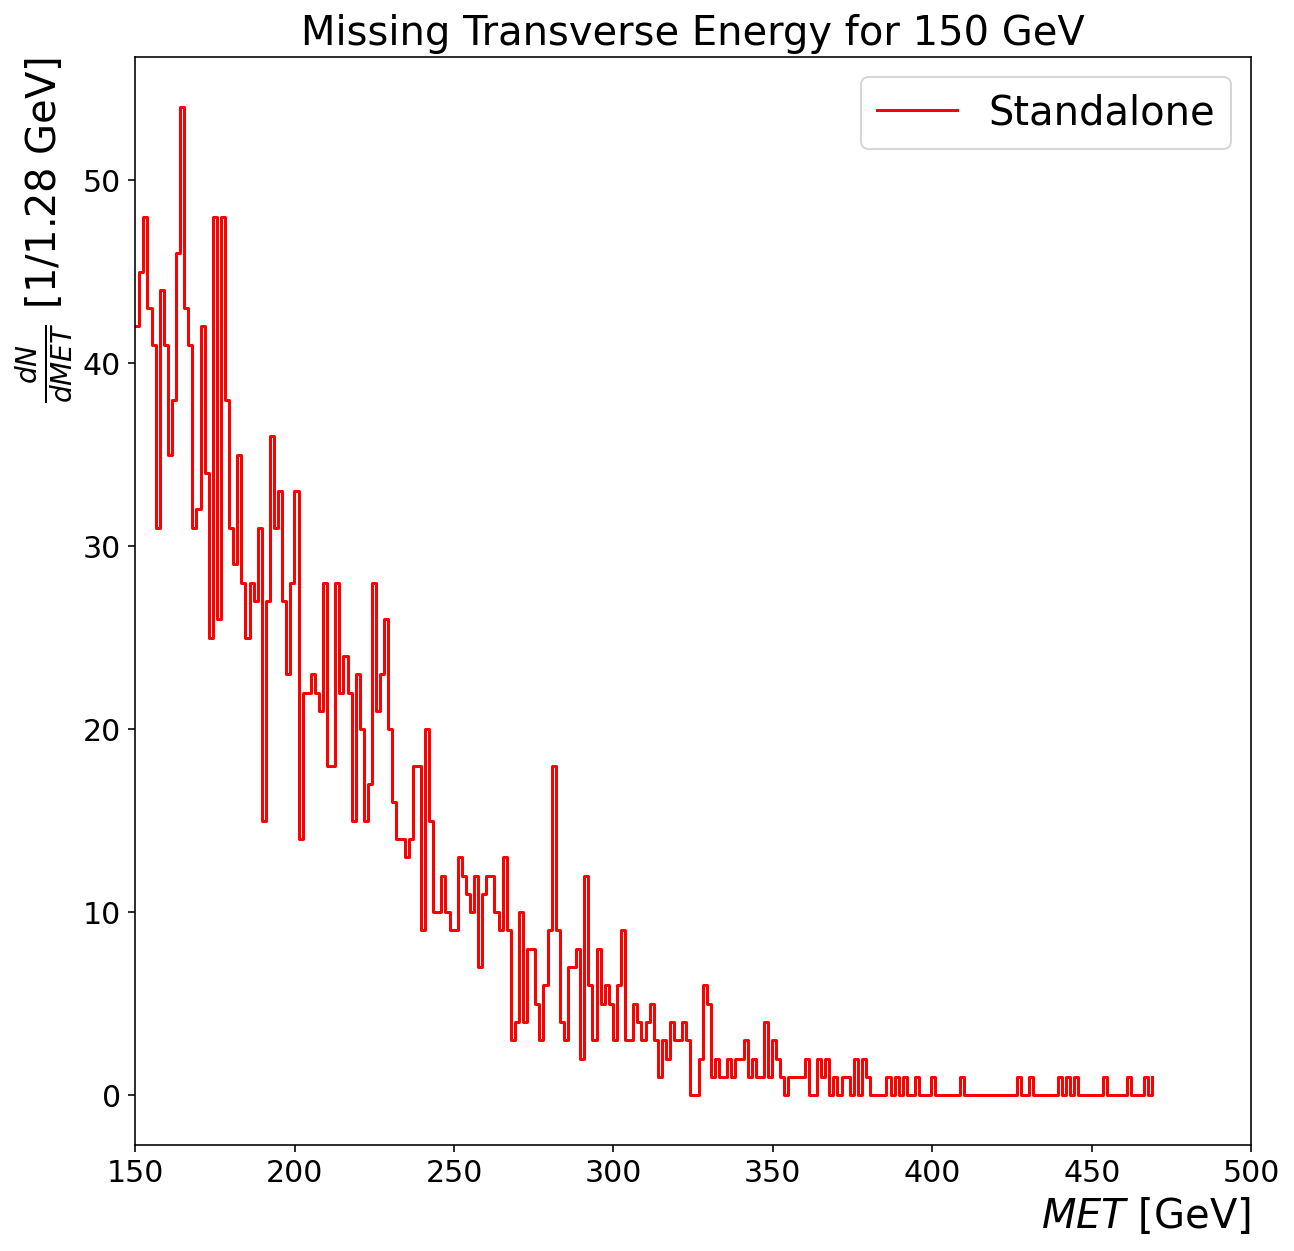

In [30]:
plt.figure(figsize=(10,10))  # plot size
print('Total events = {} for standalone'.format(len(missing_PT_150)))

bin_size = np.linspace(np.min(missing_PT_150),np.max(missing_PT_150),251)
hist, bins = np.histogram(missing_PT_150, bins=bin_size)
plt.step(bins[:-1], hist, where='post', color='red', label='Standalone')



plt.legend(fontsize=20)
# plt.yscale('log')
plt.title('Missing Transverse Energy for 150 GeV', fontsize=20)
plt.xlabel('$MET$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dMET}$ [1/1.28 GeV]', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(150,500)
plt.show()